### Data Preprocessing

In [20]:
import cv2,os

data_path= 'dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [21]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [22]:
!pip install keras.utils

/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [23]:
import numpy as np

data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))
target = np.array(target)

from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)


In [24]:
np.save('data',data)
np.save('target',new_target)

### Traning the CNN

In [25]:

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [28]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - accuracy: 0.4823 - loss: 0.7871 - val_accuracy: 0.5318 - val_loss: 0.6676
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.6428 - loss: 0.6188 - val_accuracy: 0.7955 - val_loss: 0.4742
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - accuracy: 0.8105 - loss: 0.4495 - val_accuracy: 0.8455 - val_loss: 0.3367
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 473ms/step - accuracy: 0.8727 - loss: 0.3136 - val_accuracy: 0.8727 - val_loss: 0.2892
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 444ms/step - accuracy: 0.9120 - loss: 0.2176 - val_accuracy: 0.9227 - val_loss: 0.2447
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 439ms/step - accuracy: 0.9491 - loss: 0.1388 - val_accuracy: 0.9455 - val_loss: 0.1857
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 469ms/step - accuracy: 0.9617 - loss: 0.1083 - val_accuracy: 0.9591 - val_loss: 0.1615
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 440ms/step - accuracy: 0.9702 - loss: 0.0721 - val_accu

In [34]:
model.save('final_model.keras')


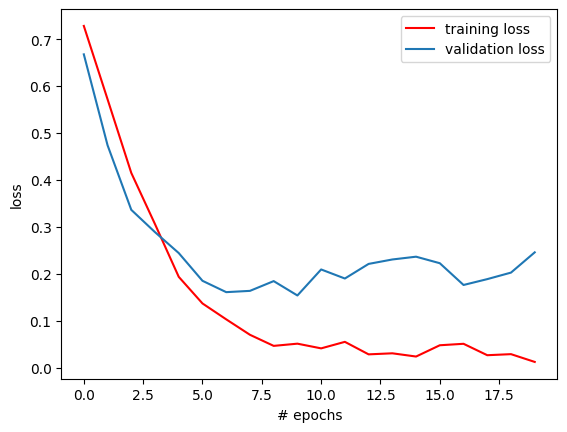

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

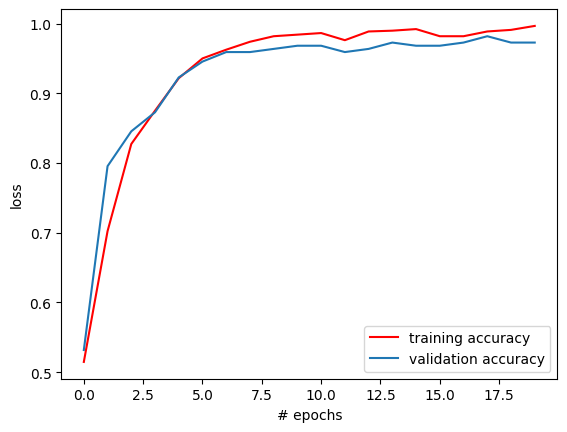

In [30]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
print(model.evaluate(test_data,test_target))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9366 - loss: 0.2453
[0.24840940535068512, 0.9347826242446899]
